In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df[df['amount']==0]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [4]:
df.drop(df[df.amount == 0].index, inplace=True)

disini ditemukan sebuah keanehan yaitu ketika melakukan cash out, amount yang diambil tidak ada data sama sekali selain itu juga tidak ada saldo berkurang ataupun bertambah dipihak penerima ataupun yang melakukan transaksi, sehingga diputuskan untuk melakukan dropping

In [5]:
df[df['amount']==0]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [6]:
# menambah  kolom untuk satuan waktu jam dalam sehari
df['hour']=df['step']%24
df.drop(columns='step',inplace =True)

untuk memudahkan dalam melakukan proses analisis, diputuskan untuk mengubah satuan jam dalam sebulan menjadi satuan jam dalam sehari

In [7]:
df.shape

(6362604, 11)

In [8]:
df['isFraud'].value_counts()

0    6354407
1       8197
Name: isFraud, dtype: int64

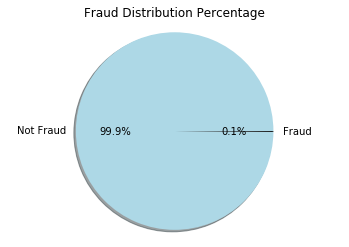

In [30]:
labels = 'Not Fraud', 'Fraud'
colors = ['lightblue', 'Black']
plt.pie(df['isFraud'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Fraud Distribution Percentage')
plt.show()

## Feature Engineering & Selection

In [9]:
df['Type_encode'] = df['type'].map({'TRANSFER': 0, 'CASH_OUT': 1, 'PAYMENT':2, 'DEBIT':3, 'CASH_IN':4})

In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,Type_encode
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,2
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,2
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,2


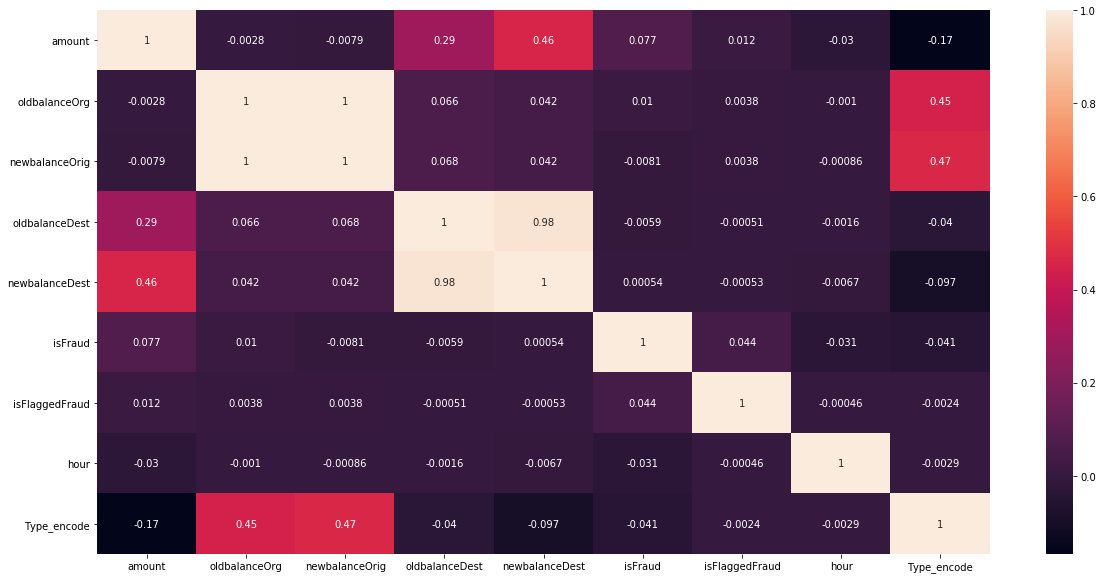

In [12]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(),  annot = True)
plt.show()

In [14]:
correlation = df.corr()
correlation['isFraud'].sort_values(ascending = False)[1:]

amount            0.076784
isFlaggedFraud    0.044152
oldbalanceOrg     0.010185
newbalanceDest    0.000542
oldbalanceDest   -0.005887
newbalanceOrig   -0.008136
hour             -0.031413
Type_encode      -0.040935
Name: isFraud, dtype: float64

In [15]:
from sklearn.utils import resample

In [16]:
from sklearn.model_selection import train_test_split


## Feature Selection

In [17]:
X = df.drop(columns=['isFraud','nameOrig','nameDest','type'])
y= df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, stratify = y,random_state = 42)

In [18]:
df_train = pd.concat([X_train, y_train], axis=1)

In [19]:
df_train['isFraud'].value_counts()

0    5083525
1       6558
Name: isFraud, dtype: int64

## Handling Imbalance Data With Undersampling

In [20]:
non_fraud = df_train[df_train['isFraud'] == 0] ## non Fraud
fraud = df_train[df_train['isFraud'] == 1] ## Fraud

In [21]:
fraud_undersample = resample(non_fraud,
                           replace=False,
                           n_samples = len(fraud),
                           random_state = 42)

In [22]:
df_Undersampled = pd.concat([fraud_undersample, fraud])
df_Undersampled['isFraud'].value_counts()

1    6558
0    6558
Name: isFraud, dtype: int64

## Machine Learning Preprocessing

In [23]:
X_train_US = df_Undersampled.drop(columns='isFraud')
y_train_US = df_Undersampled['isFraud']

In [24]:
X_test.shape

(1272521, 8)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

### Modelling

### a.Logistic Regression

In [26]:
Logreg = LogisticRegression()
Logreg.fit(X_train_US, y_train_US)
Logreg_predtrain = Logreg.predict(X_train_US)
Logreg_predtest = Logreg.predict(X_test)

In [27]:
print(classification_report(y_test, Logreg_predtest))



              precision    recall  f1-score   support

           0       1.00      0.68      0.81   1270882
           1       0.00      0.97      0.01      1639

    accuracy                           0.68   1272521
   macro avg       0.50      0.83      0.41   1272521
weighted avg       1.00      0.68      0.81   1272521



### b.Random Forest

In [29]:
RF = RandomForestClassifier()
RF.fit(X_train_US, y_train_US)
RF_predtrain = RF.predict(X_train_US)
RF_predtest = RF.predict(X_test)

In [30]:
print(classification_report(y_test, RF_predtest))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270882
           1       0.10      0.99      0.17      1639

    accuracy                           0.99   1272521
   macro avg       0.55      0.99      0.58   1272521
weighted avg       1.00      0.99      0.99   1272521



#### c.KNeighborsClassifier

In [32]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_US, y_train_US)
KNN_predtrain = KNN.predict(X_train_US)
KNN_predtest = KNN.predict(X_test)

In [33]:
print(classification_report(y_test, KNN_predtest))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270882
           1       0.02      0.96      0.05      1639

    accuracy                           0.95   1272521
   macro avg       0.51      0.95      0.51   1272521
weighted avg       1.00      0.95      0.97   1272521



#### d. DecisionTreeClassifier

In [36]:
DT = DecisionTreeClassifier()
DT.fit(X_train_US, y_train_US)
DT_predtrain = DT.predict(X_train_US)
DT_predtest = DT.predict(X_test)

In [37]:
print(classification_report(y_test, DT_predtest))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270882
           1       0.12      1.00      0.21      1639

    accuracy                           0.99   1272521
   macro avg       0.56      0.99      0.60   1272521
weighted avg       1.00      0.99      0.99   1272521



In [40]:
#Logreg
recall_logreg = recall_score(y_test, Logreg_predtest)
acc_logreg = accuracy_score(y_test, Logreg_predtest)
precision_logreg = precision_score(y_test, Logreg_predtest)
f1_logreg = f1_score(y_test, Logreg_predtest)
recall_logreg_train = recall_score(y_train_US, Logreg_predtrain)

print(f"train recall LogReg: {recall_logreg_train}")
print(f"test recall LogReg: {recall_logreg}")

#Random Forest

recall_RF = recall_score(y_test, RF_predtest)
acc_RF = accuracy_score(y_test, RF_predtest)
precision_RF = precision_score(y_test, RF_predtest)
f1_RF = f1_score(y_test, RF_predtest)
recall_RF_train = recall_score(y_train_US, RF_predtrain)

print(f"train recall RF: {recall_RF_train}")
print(f"test recall RF: {recall_RF}")

#KNN

recall_KNN = recall_score(y_test, KNN_predtest)
acc_KNN = accuracy_score(y_test, KNN_predtest)
precision_KNN = precision_score(y_test, KNN_predtest)
f1_KNN = f1_score(y_test, KNN_predtest)
recall_KNN_train = recall_score(y_train_US, KNN_predtrain)

print(f"train recall KNN: {recall_KNN_train}")
print(f"test recall KNN: {recall_KNN}")

#DT

recall_DT = recall_score(y_test, DT_predtest)
acc_DT = accuracy_score(y_test, DT_predtest)
precision_DT = precision_score(y_test, DT_predtest)
f1_DT = f1_score(y_test, KNN_predtest)
recall_DT_train = recall_score(y_train_US, DT_predtrain)

print(f"train recall DT: {recall_DT_train}")
print(f"test recall DT: {recall_DT}")


train recall LogReg: 0.9817017383348582
test recall LogReg: 0.9743746186699207
train recall RF: 1.0
test recall RF: 0.9945088468578401
train recall KNN: 0.9751448612381823
test recall KNN: 0.9572910311165345
train recall DT: 1.0
test recall DT: 0.9957291031116534


In [41]:
data = {
    "LogReg Train" : [recall_logreg_train],
    "LogReg Test" : [recall_logreg,acc_logreg,precision_logreg,f1_logreg],
    "KNN Train" : [recall_KNN_train],
    "KNN Test" : [recall_KNN,acc_KNN,precision_KNN,f1_KNN],
    "RF Train" : [recall_RF_train],
    "RF Test" : [recall_RF,acc_RF,precision_RF,f1_RF],
    "DT Train":[recall_DT_train],
    "DT Test" :[recall_DT,acc_DT,precision_DT,f1_DT]
}
pd.DataFrame(data=data, index = ['Recall','Accuracy','Precision','F1-Score'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test,DT Train,DT Test
Recall,0.981702,0.974375,0.975145,0.957291,1.0,0.994509,1.0,0.995729
Accuracy,0.981702,0.676777,0.975145,0.949790,1.0,0.987863,1.0,0.990597
Precision,0.981702,0.003868,0.975145,0.023994,1.0,0.095517,1.0,0.120088
F1-Score,0.981702,0.007706,0.975145,0.046814,1.0,0.174294,1.0,0.046814


Text(0.5, 1, 'Decision Tree Classifier')

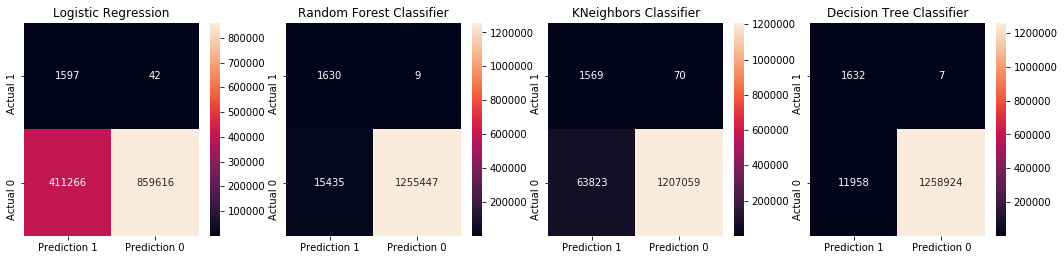

In [39]:
# Logistic Regressor
plt.figure(figsize=(18, 18))
cmLog = confusion_matrix(y_test, Logreg_predtest, labels=[1,0])
dfLog = pd.DataFrame(data=cmLog, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True,fmt='d')
plt.title('Logistic Regression')

# Random Forest Classifier
cmRF = confusion_matrix(y_test, RF_predtest, labels=[1,0])
dfRF = pd.DataFrame(data=cmRF, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,2)
sns.heatmap(dfRF, annot=True,fmt='d')
plt.title('Random Forest Classifier')

# Kneighbors Classifier
cmKNN = confusion_matrix(y_test, KNN_predtest, labels=[1,0])
dfKNN = pd.DataFrame(data=cmKNN, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,3)
sns.heatmap(dfKNN, annot=True,fmt='d')
plt.title('KNeighbors Classifier')

# Decision Tree Classifier
cmDT = confusion_matrix(y_test, DT_predtest, labels=[1,0])
dfDT = pd.DataFrame(data=cmDT, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,4)
sns.heatmap(dfDT, annot=True,fmt='d')
plt.title('Decision Tree Classifier')

Karena hasil Tuning pada base model Random Forest Classifier dan Decision Tree Classifier sudah sangat bagus, Maka yang akan dilakukan Tuning Adalah Logistic Regression Dan KNN Clasifier Saja

## Hyper Parameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV


#### a. Logistic Regression Tuning

In [43]:
Logreg_tuning = LogisticRegression()
param_logreg = {
    "penalty" : ["l1","l2","elasticnet","none"],
    "class_weight" : [dict, "balanced"],
    "max_iter" : [100,300,500,1000],
    "intercept_scaling" : [1,5,10,25,100,500]    
}
logreg_tuning = RandomizedSearchCV(estimator=Logreg_tuning, param_distributions=param_logreg, cv = 10, n_jobs=-1, verbose=1)
logreg_tuning.fit(X_train_US, y_train_US)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.5s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'class_weight': [<class 'dict'>,
                                                         'balanced'],
                                        'intercept_scaling': [1, 5, 10, 25, 100,
                                                          

In [44]:
logreg_tuning.best_params_

{'penalty': 'l2',
 'max_iter': 300,
 'intercept_scaling': 25,
 'class_weight': dict}

In [45]:
#Logreg Tuned
logreg_tuned = logreg_tuning.best_estimator_
pred_logreg_tuned = logreg_tuned.predict(X_test)
pred_logreg_train_tuned = logreg_tuned.predict(X_train_US)

recall_logreg_tuned = recall_score(y_test, pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, pred_logreg_tuned)
recall_logreg_train_tuned = recall_score(y_train_US, pred_logreg_train_tuned)

print(f"train recall LogReg Tuned: {recall_logreg_train_tuned}")
print(f"test recall LogReg Tuned: {recall_logreg_tuned}")


train recall LogReg Tuned: 0.9817017383348582
test recall LogReg Tuned: 0.9743746186699207


#### b.KNN Tuning

In [46]:
KNN_tuned = KNeighborsClassifier()
param_KNN = {
    "n_neighbors" : [1,25,100,125],
    "weights" : ["distance","uniform"],
    "algorithm" : ["auto","ball_tree", "kd_tree", "brute"],
    "leaf_size" : [1,5,25,50] 
}
KNN_tuning = RandomizedSearchCV(estimator=KNN_tuned, param_distributions=param_KNN, cv = 10, n_jobs=-1, verbose=1)
KNN_tuning.fit(X_train_US, y_train_US)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 5, 25, 50],
                                        'n_neighbors': [1, 25, 100, 125],
                                        'weights': ['distance', 'uniform']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_tr

In [47]:
KNN_tuning.best_params_

{'weights': 'uniform',
 'n_neighbors': 1,
 'leaf_size': 1,
 'algorithm': 'kd_tree'}

In [48]:
KNN_Tuned = KNN_tuning.best_estimator_
pred_KNN_tuned = KNN_Tuned.predict(X_test)
pred_KNN_train_tuned = KNN_Tuned.predict(X_train_US)

recall_KNN_tuned = recall_score(y_test, pred_KNN_tuned)
acc_KNN_tuned = accuracy_score(y_test, pred_KNN_tuned)
precision_KNN_tuned = precision_score(y_test, pred_KNN_tuned)
f1_KNN_tuned = f1_score(y_test, pred_KNN_tuned)
recall_KNN_train_tuned = recall_score(y_train_US, pred_KNN_train_tuned)

print(f"train recall KNN Tuned: {recall_KNN_train_tuned}")
print(f"test recall KNN Tuned: {recall_KNN_tuned}")

train recall KNN Tuned: 1.0
test recall KNN Tuned: 0.9664429530201343


In [52]:
data = {
    "LogReg Train" : [recall_logreg_train],
    "LogReg Test" : [recall_logreg,acc_logreg,precision_logreg,f1_logreg],
    "KNN Train" : [recall_KNN_train],
    "KNN Test" : [recall_KNN,acc_KNN,precision_KNN,f1_KNN],
    "RF Train" : [recall_RF_train],
    "RF Test" : [recall_RF,acc_RF,precision_RF,f1_RF],
    "DT Train":[recall_DT_train],
    "DT Test" :[recall_DT,acc_DT,precision_DT,f1_DT],
    "LogReg Train Tuned" : [recall_logreg_train_tuned],
    "LogReg Test Tuned" : [recall_logreg_tuned,acc_logreg_tuned,precision_logreg_tuned,f1_logreg_tuned],
    "KNN Train Tuned" : [recall_KNN_train_tuned],
    "KNN Test Tuned" : [recall_KNN_tuned,acc_KNN_tuned,precision_KNN_tuned,f1_KNN_tuned]
}
pd.DataFrame(data=data, index = ['Recall','Accuracy','Precision','F1-Score'])







,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test,DT Train,DT Test,LogReg Train Tuned,LogReg Test Tuned,KNN Train Tuned,KNN Test Tuned
Recall,0.981702,0.974375,0.975145,0.957291,1.0,0.994509,1.0,0.995729,0.981702,0.974375,1.0,0.966443
Accuracy,0.981702,0.676777,0.975145,0.949790,1.0,0.987863,1.0,0.990597,0.981702,0.676777,1.0,0.954570
Precision,0.981702,0.003868,0.975145,0.023994,1.0,0.095517,1.0,0.120088,0.981702,0.003868,1.0,0.026694
F1-Score,0.981702,0.007706,0.975145,0.046814,1.0,0.174294,1.0,0.046814,0.981702,0.007706,1.0,0.051952


Dapat dilihat hasil Tuning Logistic Regresion tidak mengalami perubahaan, dan untuk tuning KNN mengalami kenaikan. 

Text(0.5, 1, 'KNeighbors Classifier Tuned')

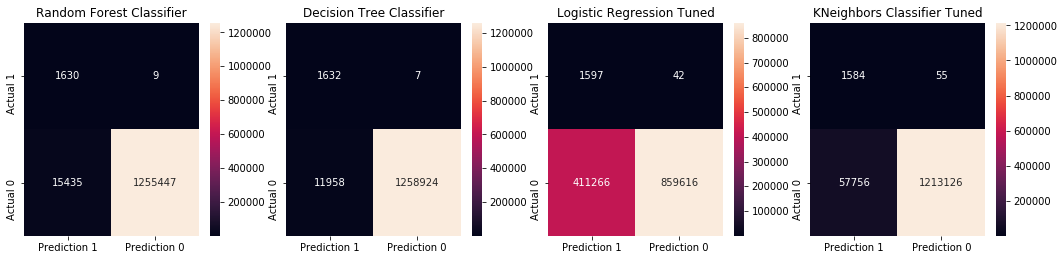

In [51]:
plt.figure(figsize=(18, 18))
# Random Forest Classifier
cmRF = confusion_matrix(y_test, RF_predtest, labels=[1,0])
dfRF = pd.DataFrame(data=cmRF, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,1)
sns.heatmap(dfRF, annot=True,fmt='d')
plt.title('Random Forest Classifier')

# Decision Tree Classifier
cmDT = confusion_matrix(y_test, DT_predtest, labels=[1,0])
dfDT = pd.DataFrame(data=cmDT, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,2)
sns.heatmap(dfDT, annot=True,fmt='d')
plt.title('Decision Tree Classifier')

#Logistic Regressor Tuned

cmLog = confusion_matrix(y_test, pred_logreg_tuned, labels=[1,0])
dfLog = pd.DataFrame(data=cmLog, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,3)
sns.heatmap(dfLog, annot=True,fmt='d')
plt.title('Logistic Regression Tuned')
#KNN Classifier Tuned

cmKNN = confusion_matrix(y_test, pred_KNN_tuned, labels=[1,0])
dfKNN = pd.DataFrame(data=cmKNN, columns=[ 'Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])
plt.subplot(4,4,4)
sns.heatmap(dfKNN, annot=True,fmt='d')
plt.title('KNeighbors Classifier Tuned')

## Conclusion 

- Saya melakukan Pengujian dengan menggunakan Algoritma Logistic Regression, KNN, Randoforest, dan DT. Dari hasil menggunakan algoritma tersebut, Random Forest menjadi Best Recall Paling baik untuk pengujian di notebook ini, dengan score 99,3899%

  